# Bonus

As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss: <br>
<br>
Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.)<br>
<br>
Create a histogram to visualize the most common salary ranges for employees.<br>
<br>
Create a bar chart of average salary by title.<br>

### Import Dependencies And Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
import config


In [2]:
#Create engine with path.
pass_path = getattr(config, 'pass_path', 'default value if not found')
engine = create_engine('postgresql://' + pass_path + '@localhost:5432/employee_db') #take password out
connection = engine.connect()


In [3]:
#Turn salary table into pandas dataframe.
salary = pd.read_sql('SELECT * FROM salaries', connection)
salary.head()


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [4]:
#Salary count to find ranges of salary.
salary_count = salary.groupby('salary').count()
salary_count

,emp_no
salary,
40000,95346
40001,5
40002,10
40003,9
40004,9
...,...
125469,1
126703,1
127041,1


In [5]:
#First histogram to visualize the most common salary ranges for employees.

#Turn salary column into list.
s = salary['salary']

#Create bins based on counts above.
Bins1 = [40000, 60000, 80000, 100000, 120000, 140000]


(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 <a list of 6 Text yticklabel objects>)

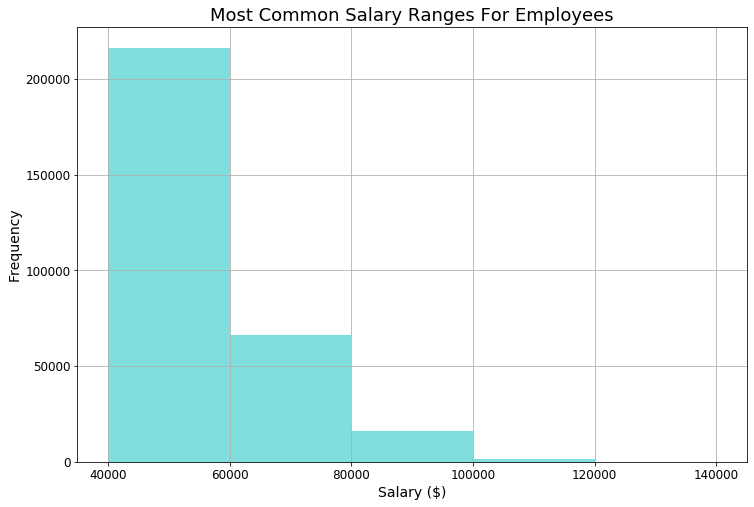

In [6]:
#Create histogram.
plt.figure(figsize = (12,8))
salary_hist1 = plt.hist(s, bins = Bins1, color = 'c', alpha=.5)
plt.grid()
plt.title('Most Common Salary Ranges For Employees', fontsize=18) #Add titles, labels, adjust fonts.
plt.xlabel('Salary ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 <a list of 9 Text yticklabel objects>)

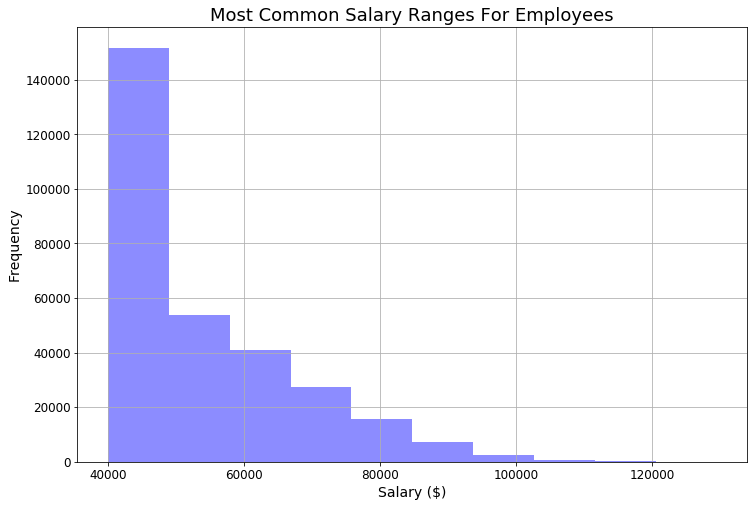

In [7]:
#Second way to create histogram. Please note they look slightly different due to x-axis scales (bins).
salary_hist2 = salary.hist(column = 'salary', figsize=(12,8), color = 'b', alpha=.45)
plt.title('Most Common Salary Ranges For Employees', fontsize=18) #Adding title, labels, adjusting font
plt.xlabel("Salary ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [8]:
#Create a bar chart of average salary by title.
#Turn employee and title tables into pandas dataframes.
employee = pd.read_sql('SELECT * FROM employees', connection)
title = pd.read_sql('SELECT * FROM titles', connection)

#Merge the employee and salary dataframes
emp_salary = salary.merge(employee, on='emp_no')

#Rename columns of emp_salary dataframe to match title dataframe in order to merge emp_salary and title dataframes.
emp_salary = emp_salary[['salary', 'emp_title_id']].rename(columns={'emp_title_id': 'title_id'})
emp_salary

#Merge the emp_salary and title dataframes.
emp_salary_title = emp_salary.merge(title, on='title_id')
emp_salary_title

,salary,title_id,title
0,60117,e0003,Senior Engineer
1,40006,e0003,Senior Engineer
2,40054,e0003,Senior Engineer
3,40000,e0003,Senior Engineer
4,60929,e0003,Senior Engineer
...,...,...,...
300019,48077,m0001,Manager
300020,40000,m0001,Manager
300021,40000,m0001,Manager
300022,53846,m0001,Manager


In [9]:
#Groupby title and find the average salary for each title.
emp_salary_title = emp_salary_title.groupby(['title'])['salary'].mean()
emp_salary_title

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

Text(0, 0.5, 'Salary ($)')

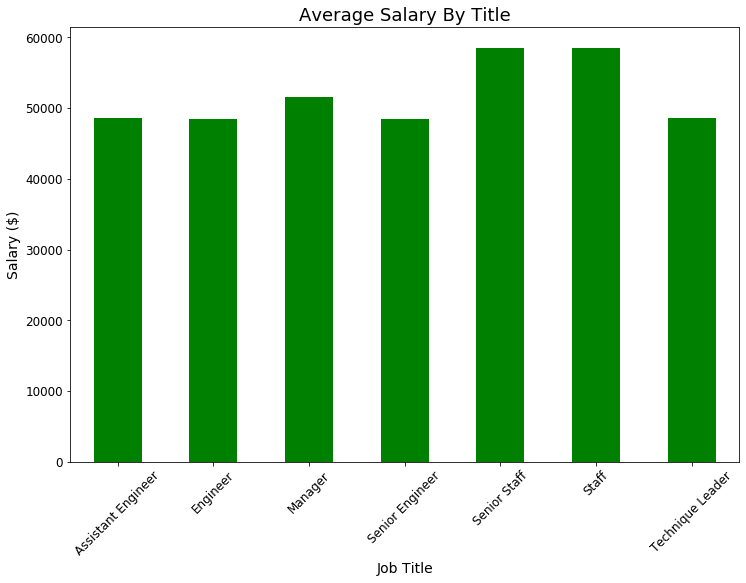

In [10]:
#Create bar plot
#emp_salary_title.plot.bar()
emp_salary_title.plot(kind='bar', figsize=(12,8), use_index=True, rot=45, fontsize=12, align = 'center', color = 'green') 
plt.title('Average Salary By Title', fontsize=18) #Add title, labels, adjust fonts.
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Salary ($)', fontsize=14)